## 1 Užduotis

Duota prekių pirkimo duomenų rinkinys, kuriame kiekvienas vartotojas yra nurodytas su jo pirkimo istorija (pavyzdžiui, pirkimo suma, pirkimo dažnis, kategorija, pirkimo data ir kt.). Užduotis yra suskirstyti vartotojus į klasterius pagal jų pirkimo elgesį.

Duomenų pavyzdys:

Vartotojas 1: {suma: 100€, dažnis: 3 kartai per mėn., kategorija: elektronika, data: 2023-01-15}
Vartotojas 2: {suma: 50€, dažnis: 1 kartą per savaitę, kategorija: maistas, data: 2023-01-20}
Vartotojas 3: {suma: 200€, dažnis: 2 kartus per mėn., kategorija: drabužiai, data: 2023-02-10}
ir tt.
Galimi sprendimo variantai:

Naudojant hierarchinį klasterizavimą, vartotojai gali būti suskirstyti į klasterius pagal jų pirkimo elgesį ir panašumus.
Atlikus klasterizavimą, galima analizuoti kiekvieno klasterio charakteristikas ir nustatyti, kokio tipo klientai dominuoja kiekviename klasteryje.

P.S. duomenų susikūrimui galite naudoti make_blobs(), kurią importuosite iš sklearn.datasets arba tiesiog aprasykite ranka

In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


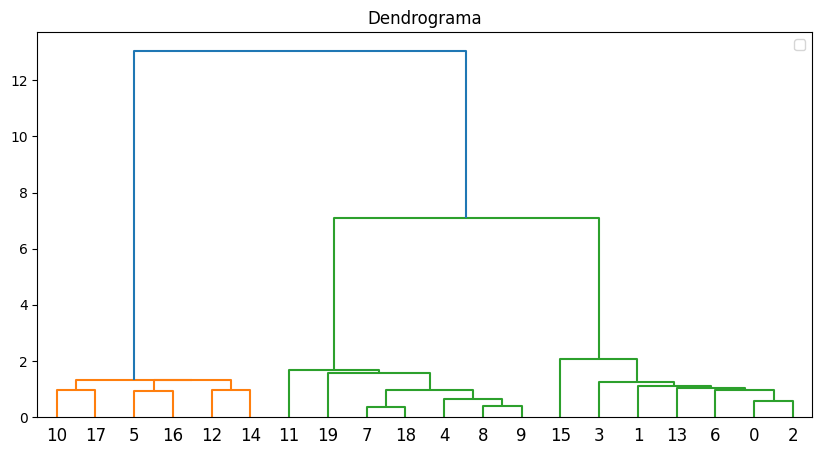

In [20]:
X, labels = make_blobs(n_samples=20, centers=3, n_features=2, random_state=42)

linked = linkage(X, 'single')

# plt.scatter(X[:,0], X[:,1])
# plt.show()

plt.figure(figsize=(10,5))
dendrogram(linked, orientation='top', labels=None)
plt.title('Dendrograma')
plt.legend(loc= 'upper right')
plt.show()

[[ 0.48349378 -0.3374832 ]
 [-0.32232919 -0.45385671]
 [-1.12815215  1.98998712]
 [ 1.69222822 -0.57023023]
 [-0.72524067 -0.62841699]]


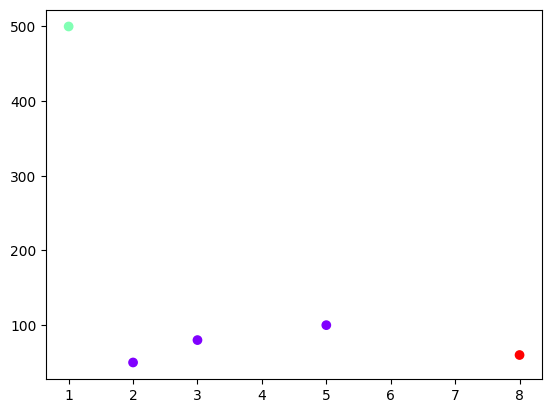

In [38]:

duomenys = np.array ([[5, 100],
            [3, 80],
            [1, 500],
            [8, 60],
            [2, 50]])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(duomenys)
print(scaled_data)

model = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster = model.fit_predict(scaled_data)

# plt.scatter(duomenys[:,0], duomenys[:,1])
# plt.show()

plt.scatter(duomenys[:,0], duomenys[:,1], c=cluster, cmap='rainbow')

plt.show()

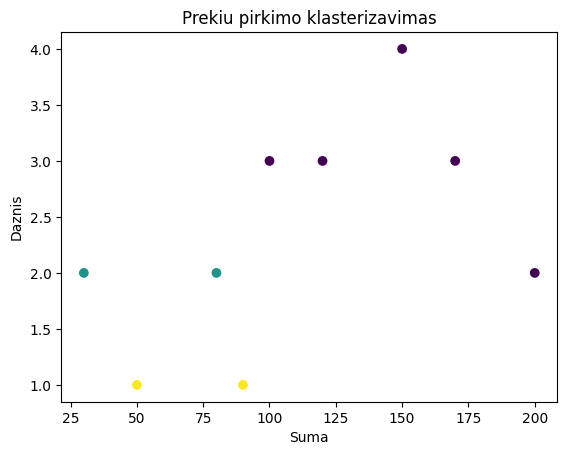

In [40]:
data = pd.read_csv('prekes.csv')

numerical_features = data[['suma', 'daznis']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_data)


plt.scatter(data['suma'], data['daznis'], c=clusters, cmap='viridis')
plt.xlabel('Suma')
plt.ylabel('Daznis')
plt.title('Prekiu pirkimo klasterizavimas')
plt.show()

## 2 Užduotis


Užduotis 2: K-vidurkių klasterizavimo užduotis

Duota gyventojų duomenų rinkinys, kuriame kiekvienas gyventojas yra nurodytas su jo amžiumi ir pajamomis. Užduotis yra suskirstyti gyventojus į klasterius pagal jų amžių ir pajamas.

Duomenų pavyzdys:

Gyventojas 1: {amžius: 35 metai, pajamos: 30000€}
Gyventojas 2: {amžius: 50 metai, pajamos: 45000€}
Gyventojas 3: {amžius: 25 metai, pajamos: 25000€}
ir tt.
Galimi sprendimo variantai:

Naudojant K-vidurkių klasterizavimą, gyventojai gali būti suskirstyti į klasterius pagal jų amžių ir pajamas.
Po klasterizavimo galima vizualizuoti klasterius ir jų centroidus, kad būtų lengviau interpretuoti gautus rezultatus.

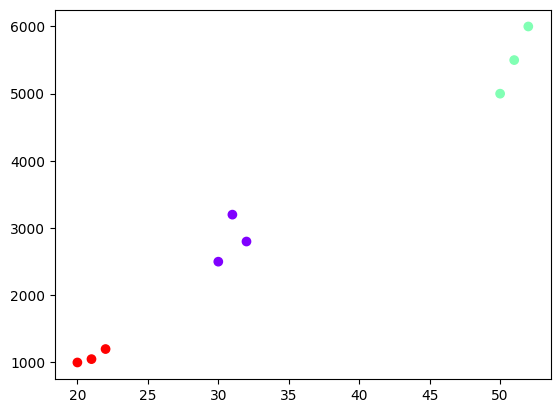

In [75]:
klientai = np.array([[20, 1000],
                     [21, 1050],
                     [22, 1200],
                     [30, 2500],
                     [32, 2800],
                     [31, 3200],
                     [50, 5000],
                     [52, 6000],
                     [51, 5500]])


kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(klientai)


plt.scatter(klientai[:,0], klientai[:,1], c=clusters, cmap='rainbow')
plt.show()

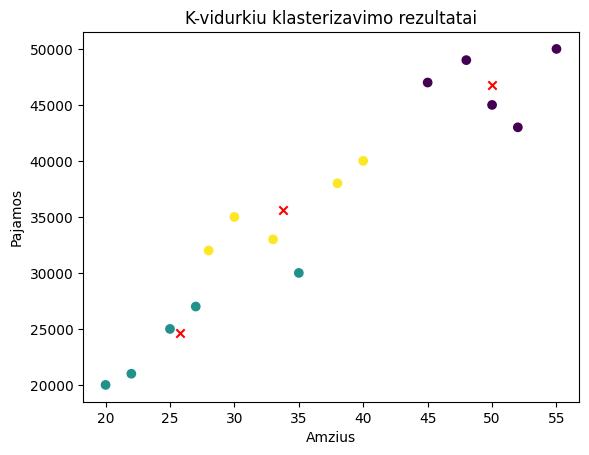

In [51]:
data = pd.read_csv('gyventojai.csv')

X = data.values
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)


plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='x', c='red')
plt.xlabel('Amzius')
plt.ylabel('Pajamos')
plt.title('K-vidurkiu klasterizavimo rezultatai')
plt.show()

## 3 Užduotis

Duota GPS sekimo duomenų rinkinys, kuriame yra įrašyti automobilių judėjimo taškai miesto centre. Užduotis yra identifikuoti pagrindinius automobilių maršrutus pagal duomenų taškų tankumą.

Duomenų pavyzdys:

Taškas 1: {lat: 54.6789, lon: 25.2798, laikas: 2023-01-15 08:00:00}
Taškas 2: {lat: 54.6890, lon: 25.2900, laikas: 2023-01-15 08:10:00}
Taškas 3: {lat: 54.6830, lon: 25.2750, laikas: 2023-01-15 08:20:00}
ir tt.
Galimi sprendimo variantai:

Naudodami DBSCAN klasterizavimą, galima identifikuoti pagrindinius automobilių maršrutus miesto centre pagal taškų tankumą.

In [58]:
latitude  =  np.random.uniform(53, 55, 100)
longitude = np.random.uniform(23, 25, 100)
data = {'latitude':latitude, 'longitude':longitude}
df = pd.DataFrame(data)
df.to_csv('kordinates.csv', index=False)

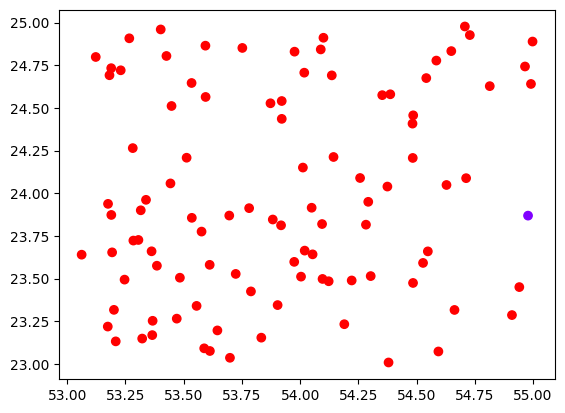

In [80]:
# data = np.array([[54.6789, 25.2798],
#                 [54.6890, 25.2900],
#                 [54.6830, 25.2750]])

df = pd.read_csv('kordinates.csv')

# plt.scatter(data[:,0], data[:,1])
# plt.show()

dbscan = DBSCAN(eps=0.3, min_samples=3)
cluster = dbscan.fit_predict(df)

plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster, cmap='rainbow')
plt.show()

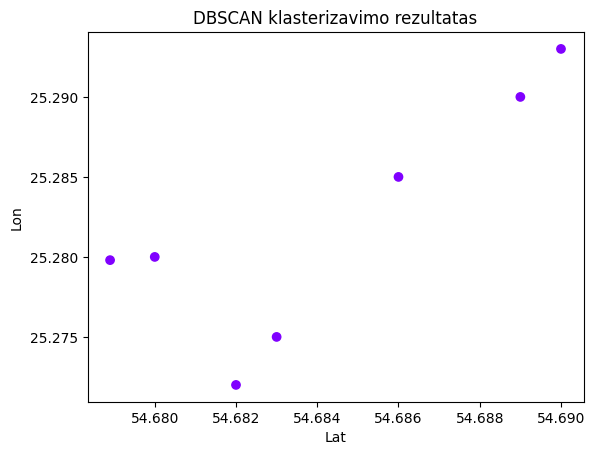

In [67]:
data = pd.read_csv('gps.csv')

X = data[['lat', 'lon']].values

dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow')
plt.title('DBSCAN klasterizavimo rezultatas')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.show()